In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train: ', x_train.shape)

170500096/170498071 [==============================] - 2s 0us/step
x_train:  (50000, 32, 32, 3)


In [3]:
K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]

Nte = x_test.shape[0]
Din = 3072 # CIFAR10    #32 x 32 x 3
# Din = 784 # MINIST


# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image

print('y_train: ', y_train.shape)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)
print('y_train: ', y_train.shape)

x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

y_train:  (50000, 1)
y_train:  (50000, 10)


In [14]:
std=1e-6
w1 = std*np.random.randn(Din, K)
b1 = np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)
batch_size = Ntr

iterations = 300
lr = 1.9e-2
lr_decay = 0.999
reg = 5e-6
loss_history = []
train_acc_history = []
val_acc_history = []
seed = 0
rng = np.random.default_rng(seed=seed)

for t in range(iterations):
    indices = np.arange(Ntr)
    rng.shuffle(indices)
    
    # Forward pass
    x = x_train[indices]
    y = y_train[indices]

    fx = x.dot(w1)+b1
    loss = (1/(2*Ntr))*np.sum(( fx - y)**2) + (1./(2*Ntr))*reg*np.sum(w1**2)
    loss_history.append(loss)
    
    # Backward pass
    dw = (1/Ntr)*(x.T.dot(fx - y))  + (1/Ntr)*reg*w1
    db1 = (1/Ntr)* np.sum(fx - y, axis = 0)
    w1 = w1 - lr*dw
    b1 = b1 - lr*db1
    lr = lr*lr_decay

    #train data accuracy
    y_pred_train = x_train.dot(w1)+b1
    train_acc = 1/Ntr*(np.argmax(y_train,axis=1)==np.argmax(y_pred_train,axis=1)).sum()
    train_acc_history.append(train_acc)

    #test data acuracy
    y_pred_test = x_test.dot(w1)+b1
    test_acc = 1/Nte*(np.argmax(y_test,axis=1)==np.argmax(y_pred_test,axis=1)).sum()
    val_acc_history.append(test_acc)

    if t%20==0:
        print("Iteration " + str(t) + " : loss = " + str(loss))
        print("train accuracy :", train_acc)
        print("test accuracy :", test_acc)


w1: (3072, 10)
b1: (10,)
Iteration 0 : loss = 0.4999998581495861
train accuracy : 0.24396
test accuracy : 0.2487
Iteration 20 : loss = 0.43114154737610066
train accuracy : 0.36448
test accuracy : 0.36200000000000004
Iteration 40 : loss = 0.41425869675781424
train accuracy : 0.38004000000000004
test accuracy : 0.3801
Iteration 60 : loss = 0.4061260931289099
train accuracy : 0.38860000000000006
test accuracy : 0.38720000000000004
Iteration 80 : loss = 0.40184089411217644
train accuracy : 0.39444
test accuracy : 0.39080000000000004
Iteration 100 : loss = 0.39938212691629993
train accuracy : 0.39796000000000004
test accuracy : 0.3929
Iteration 120 : loss = 0.3978370612677304
train accuracy : 0.40132
test accuracy : 0.395
Iteration 140 : loss = 0.3967756734571984
train accuracy : 0.40372
test accuracy : 0.396
Iteration 160 : loss = 0.39598746961548714
train accuracy : 0.40532
test accuracy : 0.3957
Iteration 180 : loss = 0.3953650472416251
train accuracy : 0.40764000000000006
test accuracy 

Text(0, 0.5, 'Loss')

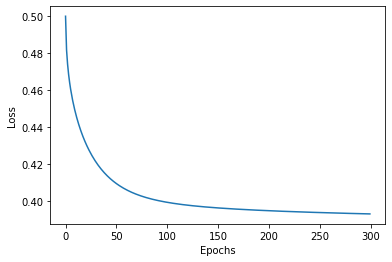

In [48]:
#loss
fig , ax = plt.subplots()
ax.plot(loss_history, label='loss')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')

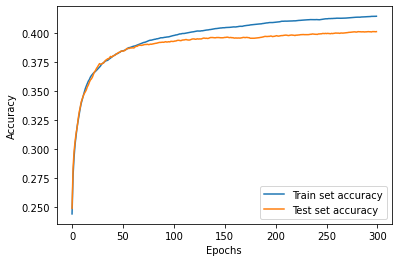

In [49]:
#Train and Test accuracies
fig , ax = plt.subplots()
ax.plot(train_acc_history, label='Train set accuracy')
ax.plot(val_acc_history, label = 'Test set accuracy')
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')
ax.legend()

In [50]:
print("Initial learning rate: " + str(1.4e-2) + ", Train set accuracy: " + str(train_acc_history[-1]) + ", Test set accuracy: " + str(val_acc_history[-1]))

Initial learning rate: 0.014, Train set accuracy: 0.41458000000000006, Test set accuracy: 0.40130000000000005


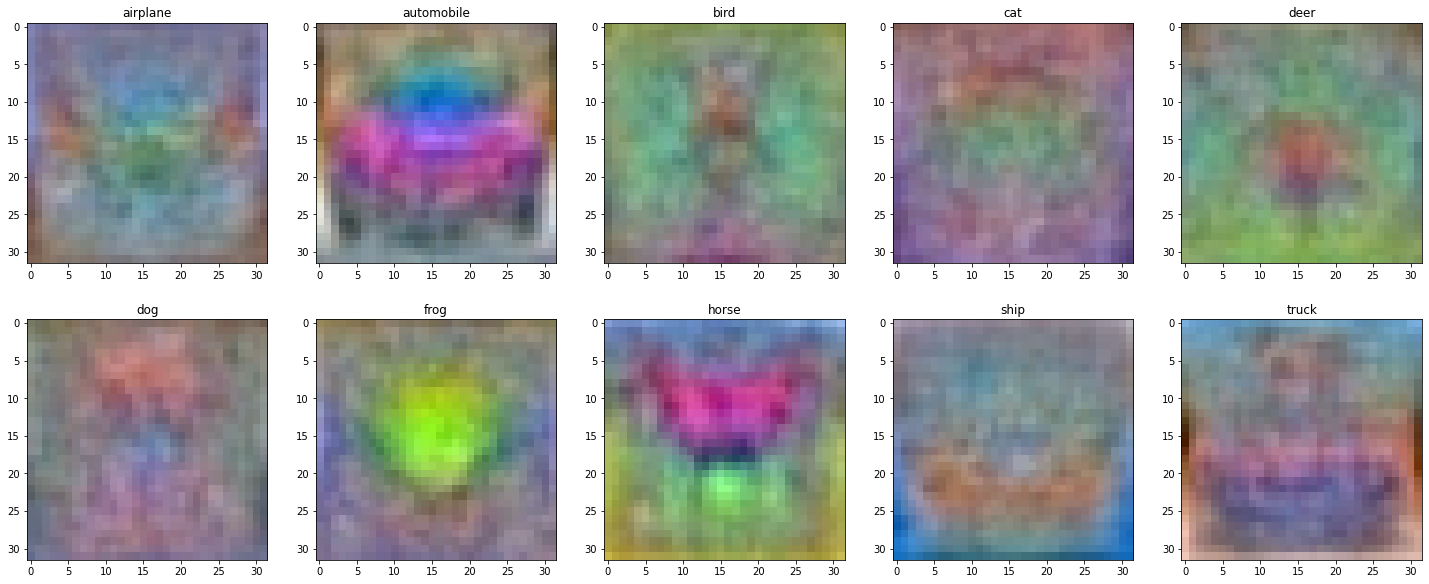

In [51]:
weights_pos = w1-np.min(w1)
images = ((weights_pos/np.max(weights_pos))*255).astype('uint8')
CIFAR10 = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
fig, axes = plt.subplots(2,5,sharex='all', sharey='all',figsize=(25,10))

for i in range(K):
    img = images[:,i]
    img = np.reshape(img,(32,32,3))   
    plt.subplot(2,5,i+1)
    plt.imshow(img)
    plt.title(CIFAR10[i]) 